In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
#Q2 
#Figure 2.3 for Non-stationary Setting

In [9]:
#Non-Stationary setting, action-value estimates: constant step, Optimistic Initial Values
def BanditSOIVc(k, ep = 0.0, t = 2000, alpha = 0.1):
    Optimal = []
    Avg_rew = []
    action = random.randint(0,9)
    N = []
    Reward = 0
    Q_estimates = []
    Q_Actual = np.random.normal(0, 0, k)
    for i in range(k):
        N.append(0)
        Q_estimates.append(5) # Initialize with optimistically high value
    for i in range(1, t+1, 1):
        guess = random.uniform(0,1)
        if guess > ep:
            if i != 1:
                action = np.argmax(Q_estimates)

        else:
            action = random.randint(0,9)
            
        Reward = np.random.normal(Q_Actual[action], 1, 1)
        N[action] = N[action] + 1
        Q_estimates[action] = Q_estimates[action] + (alpha)*(Reward - Q_estimates[action])
        
        opt = np.argmax(Q_Actual)
        if opt == action:
            Optimal.append(1) #Optimal array
        else:
            Optimal.append(0)
        Avg_rew.append(Reward) #Reward array
        
        #random Walk for non-stationary setting
        Q_addition = np.random.normal(0, 0.01, k)
        Q_Actual = np.add(Q_Actual, Q_addition)
        
    return Avg_rew, Optimal

In [10]:
#Non-Stationary setting, action-value estimates: constant step
def BanditNSc(k, ep = 0.1, m = 100, alpha = 0.1):
    Avg_rew = []
    Optimal = []
    opt = 0
    total = 100
    action = random.randint(0,9)
    N = []
    Reward = 0
    Q_estimates = []
    Q_Actual = np.random.normal(0, 0, k)
    for i in range(k):
        N.append(0)
        Q_estimates.append(0)
    for i in range(1, m+1, 1):
        guess = random.uniform(0,1)
        if guess > ep:
            if i != 1:
                action = np.argmax(Q_estimates)
        else:
            action = random.randint(0,9)
        Reward = np.random.normal(Q_Actual[action], 1, total)[random.randint(0, total - 1)]
        N[action] = N[action] + 1
        Q_estimates[action] = Q_estimates[action] + alpha*(Reward - Q_estimates[action])
        
        opt = np.argmax(Q_Actual)
        if opt == action:
            Optimal.append(1) #Optimal array
        else:
            Optimal.append(0)
        Avg_rew.append(Reward) #Reward array
        
        Q_addition = np.random.normal(0, 0.01, k)
        Q_Actual = np.add(Q_Actual, Q_addition)
           
    return Avg_rew, Optimal

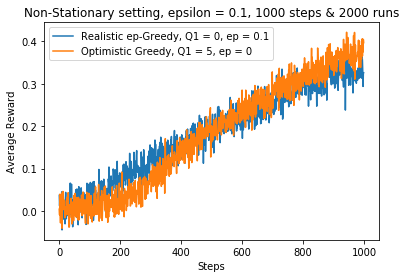

In [11]:
alpha = 0.1
Sa = []
Sb = []
Ca = []
Cb = []
for i in range(2000):
    avgs, opts = BanditNSc(10, 0.1, 1000, alpha)
    Sa.append(avgs)
    Sb.append(opts)
    avgc, optc = BanditSOIVc(10, 0.0, 1000, alpha)
    Ca.append(avgc)
    Cb.append(optc)

    
avg1 = np.mean(Sa, axis = 0)
avg2 = np.mean(Ca, axis = 0)
plt.plot(avg1, label = 'Realistic ep-Greedy, Q1 = 0, ep = 0.1')
plt.plot(avg2, label = 'Optimistic Greedy, Q1 = 5, ep = 0')
plt.xlabel('Steps') 
plt.ylabel('Average Reward') 
plt.title('Non-Stationary setting, epsilon = 0.1, 1000 steps & 2000 runs')
plt.legend()
plt.show()

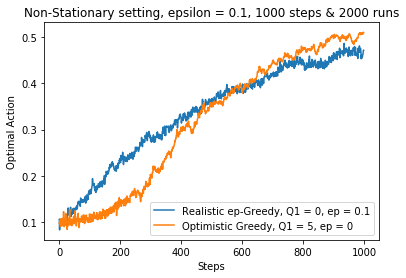

In [12]:
#Plotting optimal percentage graph
avg1 = np.mean(Sb, axis = 0)
avg2 = np.mean(Cb, axis = 0)
plt.plot(avg1, label = 'Realistic ep-Greedy, Q1 = 0, ep = 0.1')
plt.plot(avg2, label = 'Optimistic Greedy, Q1 = 5, ep = 0')
plt.xlabel('Steps') 
plt.ylabel('Optimal Action') 
plt.title('Non-Stationary setting, epsilon = 0.1, 1000 steps & 2000 runs')
plt.legend()
plt.show()